# Dividir el dataset en conjunto de entrenamiento y de testing


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
a = np.random.randn(len(data))

(array([ 1.,  2., 14., 19., 26., 33., 40., 33., 25.,  7.]),
 array([-3.10145026, -2.59425979, -2.08706933, -1.57987886, -1.07268839,
        -0.56549793, -0.05830746,  0.44888301,  0.95607347,  1.46326394,
         1.97045441]),
 <BarContainer object of 10 artists>)

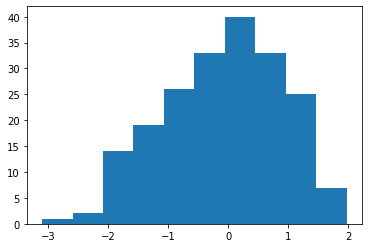

In [5]:
plt.hist(a)

In [6]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [7]:
len(training), len(testing)

(157, 43)

In [8]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio",data=training).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     615.3
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.61e-74
Time:                        22:23:56   Log-Likelihood:                -306.52
No. Observations:                 157   AIC:                             619.0
Df Residuals:                     154   BIC:                             628.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9958      0.340      8.800      0.000       2.323       3.668
TV             0.0456      0.002     28.174      0.000       0.042       0.049
Radio          0.1844      0.009     19.549      0.000       0.166       0.203
==============================================================================
Omnibus:                       54.566   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.110
Skew:                          -1.428   Prob(JB):                     5.09e-32
Kurtosis:                       6.725   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales = 3.2208+0.0438TV+0.1911Radio

## Validacion del modelo con el comjunto de testing

In [10]:
sales_pred = lm.predict(testing)
sales_pred

3      17.522960
7      12.093971
14     18.374287
15     20.706000
16     12.837352
17     23.136616
20     18.068044
22      6.529599
27     17.030103
29      9.167087
34      7.620549
43     13.984980
44      8.879400
57     12.750272
58     21.758975
61     22.791039
66      8.968612
67     12.025180
69     20.981834
72     10.302869
76      4.545589
82     10.174330
83     14.321252
84     20.665329
96     12.657225
98     24.013128
105    17.842705
113    16.357490
115    12.875444
116    11.983743
122    13.658999
126    10.523719
131    15.631061
135    13.865053
140     9.479216
148    12.159805
174    13.770364
176    19.897811
182     6.611031
187    17.006768
188    18.608195
196     8.197402
198    23.679486
dtype: float64

In [11]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

101.42634026043339

In [12]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.5923751148868268

In [13]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.10873770039722652

# Resumen


ValueError: x and y must have same first dimension, but have shapes (200, 1) and (43,)

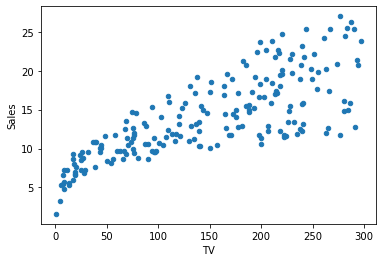

In [17]:
%matplotlib inline
sales_pred = lm.predict(testing)
data.plot(kind="scatter",x="TV",y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth=2)

In [16]:
from IPhyton.display import Image
Image(filename="../notebooks/resources/summary-lm.png")

ModuleNotFoundError: No module named 'IPhyton'